# Student Insight Notebook

This notebook has been created the do some analysis on the Student Performance dataset hosted by the UCI Machine Learning Repository available at https://archive.ics.uci.edu/ml/datasets/Student+Performance

The purpose of this exercise is to help predict those students who might fail the third year. You need to have a third year grade of atleast 10 or above to pass.  

Firstly we shall begin with some descriptive statistcal analysis on the dataset and see if we can draw some conclusipons about the data from them. After that, we shall create a model which should be able to predict that given a student's past performance in the first and second year grades, among other parameters,  (G1 and G2), how likely would she/he be to pass the the final grade (G3) 

## <u>Section 1 Exploratory Data Analysis</u>

First we'll start by importing the dataset

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('Student_data.csv')


Now let's take a look at the columns of the data. Before the start of any analysis it is always a good idea to really get down and study the data closely. The features (or columns) of the data is always a good place to start. The more we know about the data the better we'll be able to get out of it. 

In [70]:
data.columns  #Prints out the columns of the data

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

The dataset contains 33 columns that describe the various socio economic aspects of the life of a student. We also note that three columns G1, G2 and G3, which contains the grades of a student for three years. These scores are out of 20. Please refer to student.txt to get further insight about the columns and the kind of values they are designed to hold. I have reproduced it here for ease of reference

In [71]:
# # %load student.txt
# # Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
# 1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
# 2 sex - student's sex (binary: "F" - female or "M" - male)
# 3 age - student's age (numeric: from 15 to 22)
# 4 address - student's home address type (binary: "U" - urban or "R" - rural)
# 5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
# 6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
# 7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# 8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# 9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
# 10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
# 11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
# 12 guardian - student's guardian (nominal: "mother", "father" or "other")
# 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
# 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
# 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
# 16 schoolsup - extra educational support (binary: yes or no)
# 17 famsup - family educational support (binary: yes or no)
# 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
# 19 activities - extra-curricular activities (binary: yes or no)
# 20 nursery - attended nursery school (binary: yes or no)
# 21 higher - wants to take higher education (binary: yes or no)
# 22 internet - Internet access at home (binary: yes or no)
# 23 romantic - with a romantic relationship (binary: yes or no)
# 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
# 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
# 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
# 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
# 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
# 30 absences - number of school absences (numeric: from 0 to 93)

# # these grades are related with the course subject, Math or Portuguese:
# 31 G1 - first period grade (numeric: from 0 to 20)
# 31 G2 - second period grade (numeric: from 0 to 20)
# 32 G3 - final grade (numeric: from 0 to 20, output target)

# Additional note: there are several (382) students that belong to both datasets . 
# These students can be identified by searching for identical attributes
# that characterize each student, as shown in the annexed R file.


Now that we've got some idea about the features of our data, Let's print out the first 20 colums of the data to see the actual data 

In [72]:
data[:20] #Print out the first 20 rows of the data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


So one thing that immediately stands out is that a good chunk of the data here is <b>categorical</b> in nature, that's one thing that'll we'll need to keep in mind while doing analysis or modelling the data. Also let's generate a preliminary summary statistic for the data

In [73]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### <u>Analysis Plan</u>

As learned from observing the colums of the dataset, we see that the data is coming from quite a diverse pool of sources. Various socio economic factors such as the mother's education and income, social interaction, the exisitence of a romantic relationship etc.. have been considered. It will be a worthwhile exercise to group these features into similar groups, and then analyze if the features of those groups have any significance on the students performance. For eg, we could get answers to questions like whether or not the father or mother's occupation affect student performance or does age and gender of a student play a role in determing the performance. 

I have grouped these features into four cataegories viz.

1. <b>Age & Gender</b> ('age','sex')
<br>
<br>
2. <b>Family</b> ('famsize','Pstatus','Medu','Fedu','Mjob','Fjob','famsup','famrel','address')
<br>
<br>
3. <b>Personal</b> ('traveltime','studytime','failures','paid','activities','nursery','higher','internet','romantic','freetime','health','absences','goout','Dalc','Walc')
<br>
<br>
4. <b>School</b> ('school, schoolsup')


***If you want you can skip all the reasoning part and simply go through the conclusions, search for 'Group n: Conclusions' (where n is the group number viz 1,2,3 and 4). Also for a list of all the conclusions drawn in this section search for Section 1: Conclusions***


### <u>Group 1: Age & Gender</u>

In [74]:
# First let's extract the columns of interest into a seperate dataframe

data_agend = data.ix[:,['age','sex','G3']]

#Then let's observe the gender column
data_agend['sex'].describe()

count     1044
unique       4
top          F
freq       383
Name: sex, dtype: object

Hold on. We seem to have unearthed something funny about our dataset. We see <i>4</i> unique values for gender, which obviously is not possible (This assertion can be confirmed by referring to Student.txt and seeing what's the data allowed in the column). This is interesting and needs to be explored further

In [75]:
data_agend['sex'].unique() #Print all the unique values for sex

array(['F', 'M', '  F  ', '  M  '], dtype=object)

And there you have it. It seems that there is some corruption in our data. We've got some whitespace padding around the actual value in some rows, which is getting incorrectly represented as a different unique value. Let's fix this and then move on (Spoiler: this seems to be a recurrent issue with this data set and needs to be done for many colums)

In [76]:
data_agend['sex'] = data_agend['sex'].str.strip() #Strip the whitespaces
data_agend['sex'].describe() #Verify

count     1044
unique       2
top          F
freq       591
Name: sex, dtype: object

Things seem to be fine now. 

Now the columns we've got here are age and gender. So the first question that pops up in my head, is that, <b>Does gender have any significance on the performance of the student?</b> 

Let's figure this out.  

In [77]:
data_agend.groupby('sex').describe()['G3'] 

sex       
F    count    591.000000
     mean      11.448393
     std        3.874334
     min        0.000000
     25%       10.000000
     50%       12.000000
     75%       14.000000
     max       19.000000
M    count    453.000000
     mean      11.203091
     std        3.852167
     min        0.000000
     25%       10.000000
     50%       11.000000
     75%       14.000000
     max       20.000000
Name: G3, dtype: float64

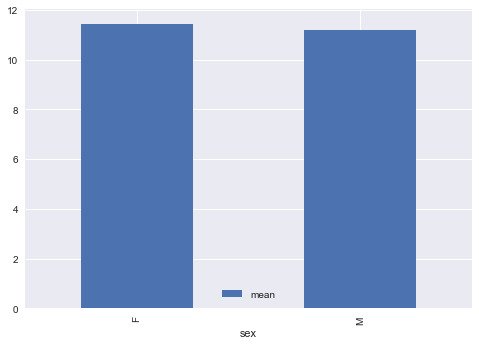

In [78]:
#Plotting the mean values

data_agend.groupby('sex').describe()['G3'][[('F','mean'),('M','mean')]].unstack().plot(kind='bar', use_index='False', legend = 'False')
plt.show()

Going by the above summary statistics, the first thing we notice is that the there are more female  students. So these figures might be slightly skewed towards the female population. But even taking that into consideration, we see that the mean score for girls and boys are almost the same, around 11. Another thing we note is that since the median ~ mode, the data is more or less normally distributed.

So from these observations we can conclude that <b> Gender has no significance on student performance </b>

The next question we could ask is that, <b> Does age play a factor in student performance </b>. Let's pull up some information from the dataset to investigate this 

In [79]:
data_agend.groupby('age').describe() 

G3
age                  
15  count  194.000000
    mean    11.747423
    std      3.398128
    min      0.000000
    25%     10.000000
    50%     12.000000
    75%     14.000000
    max     19.000000
16  count  281.000000
    mean    11.637011
    std      3.491303
    min      0.000000
    25%     10.000000
    50%     12.000000
    75%     14.000000
    max     20.000000
17  count  277.000000
    mean    11.563177
    std      3.711588
    min      0.000000
    25%     10.000000
    50%     12.000000
    75%     14.000000
    max     19.000000
18  count  222.000000
    mean    10.950450
    std      4.599063
    min      0.000000
    25%      9.000000
    50%     11.000000
...               ...
19  std      3.981614
    min      0.000000
    25%      9.000000
    50%     10.000000
    75%     11.000000
    max     14.000000
20  count    9.000000
    mean    12.666667
    std      3.162278
    min      9.000000
    25%     10.000000
    50%     12.000000
    75%     15.000000
    max     18.000000
21  count    3.000000
    mean     9.666667
    std      2.516611
    min      7.000000
    25%      8.500000
    50%     10.000000
    75%     11.000000
    max     12.000000
22  count    2.000000
    mean     6.500000
    std      2.121320
    min      5.000000
    25%      5.750000
    50%      6.500000
    75%      7.250000
    max      8.000000

[64 rows x 1 columns]

One thing that we notice is that the count of students in each age group(15-22) is different, let's see this visually

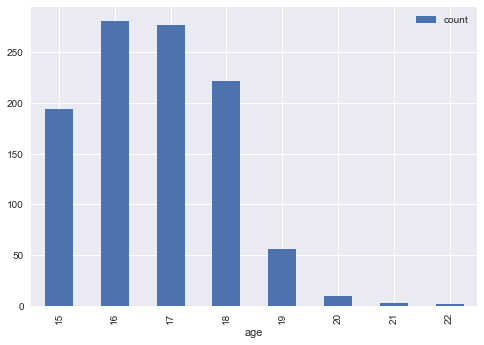

In [80]:
data_agend.groupby('age').describe()['G3'][[(15,'count'),(16,'count'),(17,'count'),(18,'count'),(19,'count'),(20,'count'),(21,'count'),(22,'count')]].unstack().plot(kind='bar', use_index='False', legend = 'False') 
plt.show()

So as we can see <b>there is a significant difference in the amount of students in each age group</b>. Majority of the students are between 15 to 18. There are very few students who are older than 18. So for the time being let's exclude them from our consideration. Comparing the mean scores of students in the age group of 15 -18 we get  

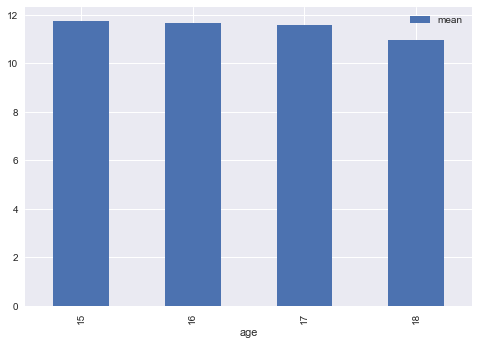

In [81]:
data_agend.groupby('age').describe()['G3'][[(15,'mean'),(16,'mean'),(17,'mean'),(18,'mean')]].unstack().plot(kind='bar', use_index='False', legend = 'False') 
plt.show()

As we can see that there is no significant difference in the scores in each age group. Thus we can for now, conclude that <b> Age does not influence student performance </b>

### <u>Group 1: Conclusions</u>

From the above analysis, we can draw the following conclusions

1. Gender has no influence on student performance
<br><br>
2. Age has no influence on student performance.
<br><br>
3. Very few enrollments by students older than 18 years.


###  <u> Group 2: Family </u>

In [82]:
##Importing columns of interest and performing preprocessing explained in Group 1

data_family = data.ix[:,['famsize','Pstatus','Medu','Fedu','Mjob','Fjob','famsup','famrel','address','G3']]

data_family['famsize'] = data_family['famsize'].str.strip()
data_family['Pstatus'] = data_family['Pstatus'].str.strip()
data_family['Mjob'] = data_family['Mjob'].str.strip()
data_family['Fjob'] = data_family['Fjob'].str.strip()
data_family['famsup'] = data_family['famsup'].str.strip()
data_family['address'] = data_family['address'].str.strip()



famsize       
GT3      count    738.000000
         mean      11.189702
         std        3.998548
         min        0.000000
         25%       10.000000
         50%       11.000000
         75%       14.000000
         max       20.000000
LE3      count    306.000000
         mean      11.709150
         std        3.500405
         min        0.000000
         25%       10.000000
         50%       12.000000
         75%       14.000000
         max       19.000000
Name: G3, dtype: float64


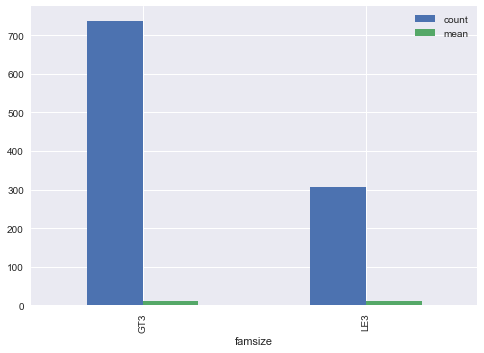

In [83]:
#Analyzing Family size and Student Performance
print(data_family[['famsize','G3']].groupby('famsize').describe()['G3'])

data_family[['famsize','G3']].groupby('famsize').describe()['G3'][[('GT3','mean'),('LE3','mean'),('GT3','count'),('LE3','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

One thing we notice is that <b>the number of families with less than or equal to three members is in the minority.</b> The presence of families with greater size than these are more than double. This is significant because, the difference in the mean of both the groups, is probably not indicative of anything because the data is so heavily skewed to one side. Therefore we can conclude that <b> Family size has no impact on student performance.</b>   

Pstatus       
A        count    121.000000
         mean      11.669421
         std        3.617984
         min        0.000000
         25%       10.000000
         50%       11.000000
         75%       14.000000
         max       19.000000
T        count    923.000000
         mean      11.299025
         std        3.895805
         min        0.000000
         25%       10.000000
         50%       11.000000
         75%       14.000000
         max       20.000000
Name: G3, dtype: float64


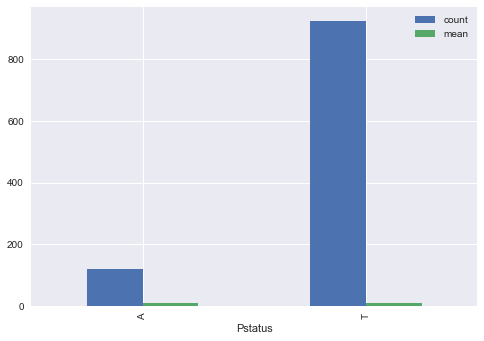

In [84]:
#Analyzing Parent's Cohabitation Status and Student Performance
print(data_family[['Pstatus','G3']].groupby('Pstatus').describe()['G3'])

data_family[['Pstatus','G3']].groupby('Pstatus').describe()['G3'][[('A','mean'),('T','mean'),('A','count'),('T','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

Once again we see a huge skew in the data. Though this one is expected in a random sample of the population space. <b>Parents living apart from each other are almost 9 times lesser than those living together</b> So once again the difference in the means of these two groups can be overlooked. We conclude saying that <b> Parent's cohabitation status has no effect on student performance </b>  

Medu       
0     count      9.000000
      mean      12.111111
      std        2.315407
      min        9.000000
      25%       11.000000
      50%       11.000000
      75%       15.000000
      max       15.000000
1     count    202.000000
      mean      10.178218
      std        3.674292
      min        0.000000
      25%        9.000000
      50%       10.000000
      75%       12.000000
      max       18.000000
2     count    289.000000
      mean      10.972318
      std        3.806874
      min        0.000000
      25%       10.000000
      50%       11.000000
      75%       13.000000
      max       19.000000
3     count    238.000000
      mean      11.247899
      std        3.893289
      min        0.000000
      25%       10.000000
      50%       11.000000
      75%       14.000000
      max       19.000000
4     count    306.000000
      mean      12.509804
      std        3.762834
      min        0.000000
      25%       11.000000
      50%       13.000000


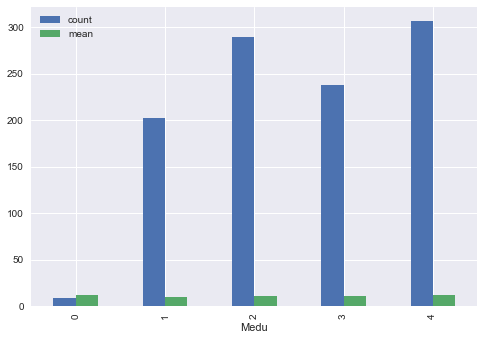

In [85]:
#Analysing Mother's Education and Job with Student Performance

print(data_family[['Medu','G3']].groupby('Medu').describe()['G3'])

data_family[['Medu','G3']].groupby('Medu').describe()['G3'][[(0,'mean'),(1,'mean'),(2,'mean'),(3,'mean'),(4,'mean'),(0,'count'),(1,'count'),(2,'count'),(3,'count'),(4,'count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()




From Students.txt, we interpret the job codes as following

0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education

First thing I note is that only 9 mother's have had no education. That would indcate that <b>99.2 % mothers of the sample population have had some form of education.</b> This is highly encouraging, though this must also be taken with a grain of salt because

1. Participants might lie about certain parameters so as to appear socially adequate. One's parent's education might be such an example
<br> <br>
2. This data is sampled from a population that goes to school. Parents in such a population are probably more likely to have an education than parents from a more genralized sample space. 


Keeping aside the no education category, we notice that the counts for the rest fall within the 200-300 window. Since these are in a comparable window let's see what the mean scores indicate. 


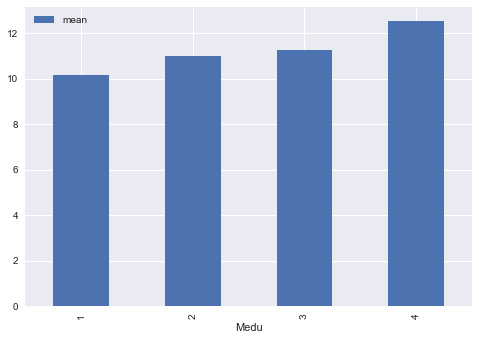

In [86]:
data_family[['Medu','G3']].groupby('Medu').describe()['G3'][[(1,'mean'),(2,'mean'),(3,'mean'),(4,'mean')]].unstack().plot(kind='bar', use_index='False', )
plt.show()


We see that as the level of education of the mother increases, the mean score of the student does too. There is almost a 2 point increase in a student's performance between a primary educated mother(1) and a higly educated one(4). One must keep in mind that there are 100 odd extra observations in cataegory 4, but the two point increase is significant enough to conclude that <b> The higher the mother's education, the better the student's performance </b>. Though by what fraction does this actually influence the performance is yet to be seen.   

Mjob           
at_home   count    194.000000
          mean      10.469072
          std        3.785926
          min        0.000000
          25%        9.000000
          50%       11.000000
          75%       13.000000
          max       19.000000
health    count     82.000000
          mean      12.682927
          std        3.544699
          min        0.000000
          25%       10.000000
          50%       13.000000
          75%       15.000000
          max       20.000000
other     count    399.000000
          mean      11.017544
          std        3.811803
          min        0.000000
          25%       10.000000
          50%       11.000000
          75%       13.000000
          max       19.000000
services  count    239.000000
          mean      11.661088
          std        3.853160
          min        0.000000
          25%       10.000000
          50%       12.000000
          75%       14.000000
          max       19.000000
teacher   count    130.0

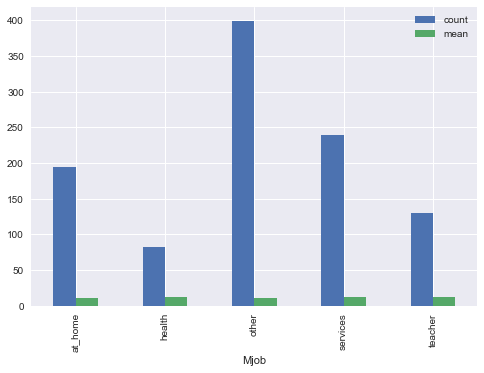

In [87]:
print(data_family[['Mjob','G3']].groupby('Mjob').describe()['G3'])


data_family[['Mjob','G3']].groupby('Mjob').describe()['G3'][[('at_home','mean'),('health','mean'),('other','mean'),('services','mean'),('teacher','mean'),('at_home','count'),('health','count'),('other','count'),('services','count'),('teacher','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

Here we see that the 'Other' cataegory of job has a lot of data. This could indicate two things. One that the survey choices to the question were not designed according to the target population. Or that researchers were interested in the specific job types only. It is more productive to assume the latter and carry on. Thus for this segment we simply ignore the data points with the other label. 

The first theing we notice in this distribution is that the population of stay at home moms is quite significant. But the mean score for that category is the lowest. <b>Surprisingly the notion that student's perform better with stay at home moms seems to be debunked here.</b> We also see that <b>Students whose Mothers have highly specialized jobs like teaching or being in the health sector tend to perform better</b> We also see that Students with Mothers in the services section perform slightly better on the whole. Since all the three jobs, require a certain level of education, this ties in with our previous assumption also viz. Students with will educated mothers perform better


Fedu       
0     count      9.000000
      mean      12.333333
      std        2.872281
      min       10.000000
      25%       10.000000
      50%       11.000000
      75%       13.000000
      max       18.000000
1     count    256.000000
      mean      10.367188
      std        3.906498
      min        0.000000
      25%        9.000000
      50%       10.000000
      75%       13.000000
      max       19.000000
2     count    324.000000
      mean      11.243827
      std        4.012264
      min        0.000000
      25%       10.000000
      50%       11.000000
      75%       14.000000
      max       19.000000
3     count    231.000000
      mean      11.636364
      std        3.413181
      min        0.000000
      25%       10.000000
      50%       12.000000
      75%       14.000000
      max       20.000000
4     count    224.000000
      mean      12.254464
      std        3.835459
      min        0.000000
      25%       11.000000
      50%       13.000000


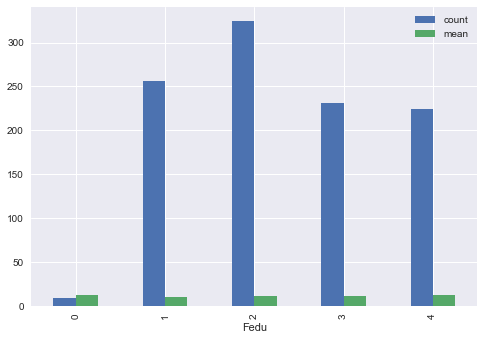

In [88]:
#Repeating the above exercise for Father's education and job

print(data_family[['Fedu','G3']].groupby('Fedu').describe()['G3'])

data_family[['Fedu','G3']].groupby('Fedu').describe()['G3'][[(0,'mean'),(1,'mean'),(2,'mean'),(3,'mean'),(4,'mean'),(0,'count'),(1,'count'),(2,'count'),(3,'count'),(4,'count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()


Here we see a somewhat similar distribution like the one we saw for mothers. But there are some interesting subtelties. Ignoring the no education ones while comparing the men and women's education figures we can conclude that <b>It is more likely that women will pursue secondary and higher education than men </b> This is derived from the fact that the <b> 52% of women have chosen to pursue secondary or higher education compared to 43% of the men </b>

As for the impact on student performance, it pretty much follows the same trend as the mothers. Thus we can conclude that <b>The higher the father's education, the better the student's performance</b> 

Fjob           
at_home   count     62.000000
          mean      11.016129
          std        4.010200
          min        0.000000
          25%       10.000000
          50%       11.000000
          75%       14.000000
          max       19.000000
health    count     41.000000
          mean      12.146341
          std        3.174594
          min        6.000000
          25%       10.000000
          50%       12.000000
          75%       14.000000
          max       18.000000
other     count    584.000000
          mean      11.260274
          std        3.761418
          min        0.000000
          25%       10.000000
          50%       11.000000
          75%       14.000000
          max       19.000000
services  count    292.000000
          mean      11.123288
          std        3.912954
          min        0.000000
          25%        9.750000
          50%       11.000000
          75%       14.000000
          max       20.000000
teacher   count     65.0

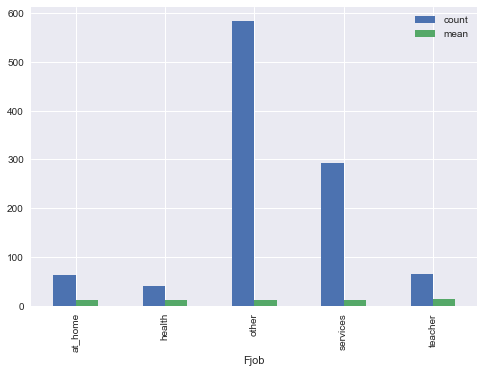

In [89]:
print(data_family[['Fjob','G3']].groupby('Fjob').describe()['G3'])


data_family[['Fjob','G3']].groupby('Fjob').describe()['G3'][[('at_home','mean'),('health','mean'),('other','mean'),('services','mean'),('teacher','mean'),('at_home','count'),('health','count'),('other','count'),('services','count'),('teacher','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

Once again we see that students with stay at home dads have the least performance amongst the groups. We also see that as was in the case of the mothers, <b>Jobs in health sector and education sector correlate to a better student performance</b>. Another thing which we note is that <b> Only 10% of the male populations are into these specialized sectors, compared to 20% of the female population. This also confirms the fact that women tend to be better educated than men, since a higher education is a prerequisite for entry in such sectors </b>   

Now let's move on to factors like family relations and family support

famrel       
1       count     30.000000
        mean      10.633333
        std        3.908288
        min        0.000000
        25%        9.000000
        50%       11.000000
        75%       12.750000
        max       17.000000
2       count     47.000000
        mean      10.489362
        std        4.471515
        min        0.000000
        25%        9.500000
        50%       11.000000
        75%       13.000000
        max       17.000000
3       count    169.000000
        mean      10.970414
        std        3.830371
        min        0.000000
        25%       10.000000
        50%       11.000000
        75%       13.000000
        max       19.000000
4       count    512.000000
        mean      11.587891
        std        3.688466
        min        0.000000
        25%       10.000000
        50%       11.500000
        75%       14.000000
        max       20.000000
5       count    286.000000
        mean      11.335664
        std        4.059114
      

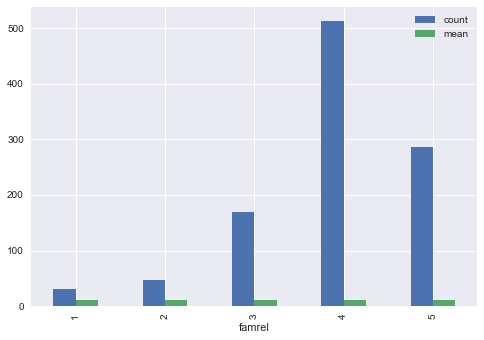

In [90]:
print(data_family[['famrel','G3']].groupby('famrel').describe()['G3'])


data_family[['famrel','G3']].groupby('famrel').describe()['G3'][[(1,'mean'),(2,'mean'),(3,'mean'),(4,'mean'),(5,'mean'),(1,'count'),(2,'count'),(3,'count'),(4,'count'),(5,'count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

As we can see the counts are heavily skewed in the favor of the 4th rating (ratings are in order of increasing satisfaction). Almost 50% of the sample population has opted that. We do see a trend where a low family relation rating implies a low student performance but because of the way the data is distributed, this claim can't be substantiated.  Also the variance of the mean score amongst all the groups is less than a point. So given the low variance of the score amongst different categories and the skew in the data, <b> We can't assume any correlation exists between family relations and student performance </b>

famsup       
no      count    404.000000
        mean      11.277228
        std        4.050228
        min        0.000000
        25%       10.000000
        50%       11.000000
        75%       14.000000
        max       20.000000
yes     count    640.000000
        mean      11.382812
        std        3.745673
        min        0.000000
        25%       10.000000
        50%       11.000000
        75%       14.000000
        max       19.000000
Name: G3, dtype: float64


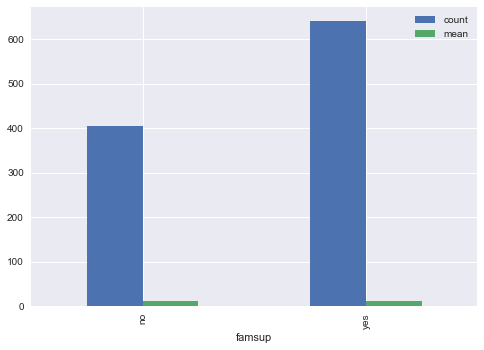

In [91]:
print(data_family[['famsup','G3']].groupby('famsup').describe()['G3'])

data_family[['famsup','G3']].groupby('famsup').describe()['G3'][[('no','mean'),('yes','mean'),('no','count'),('yes','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

As is evident <b> The presence of absence of Family support has no influence on Student performance </b> 

### <u> Group 2: Conclusions </u>

1. The presence of absence of Family support has no influence on Student performance
<br>
<br>
2. We can't assume any correlation exists between family relations and student performance
<br>
<br>
3. Jobs in health sector and education sector correlate to a better student performance.
<br>
<br>
4. The higher the parent's education, the better the student's performance
<br>
<br>
5. It is more likely that women will pursue secondary and higher education than men. 52% of women have chosen to pursue secondary or higher education compared to 43% of the men
<br>
<br>
6.  Only 10% of the male populations are into these specialized sectors(health and education), compared to 20% of the female population. This also confirms the fact that women tend to be better educated than men, since a higher education is a prerequisite for entry in such sectors
<br>
<br>
7. Parent's cohabitation status has no effect on student performance
<br>
<br>
8. Family size has no impact on student performance.


### <u> Group 3: Personal </u>

In [92]:
#Importing and preprocessing

data_personal = data.ix[:,['traveltime','studytime','failures','paid','activities','nursery','higher','internet','romantic','freetime','health','absences','goout','Dalc','Walc','G3']]


data_personal['paid'] = data_personal['paid'].str.strip()
data_personal['activities'] = data_personal['activities'].str.strip()
data_personal['nursery'] = data_personal['nursery'].str.strip()
data_personal['higher'] = data_personal['higher'].str.strip()
data_personal['internet'] = data_personal['internet'].str.strip()
data_personal['romantic'] = data_personal['romantic'].str.strip()



traveltime       
1           count    623.000000
            mean      11.645265
            std        3.825495
            min        0.000000
            25%       10.000000
            50%       12.000000
            75%       14.000000
            max       20.000000
2           count    320.000000
            mean      11.018750
            std        3.929587
            min        0.000000
            25%       10.000000
            50%       11.000000
            75%       13.000000
            max       19.000000
3           count     77.000000
            mean      10.597403
            std        3.961192
            min        0.000000
            25%        9.000000
            50%       11.000000
            75%       13.000000
            max       18.000000
4           count     24.000000
            mean      10.166667
            std        2.884240
            min        0.000000
            25%        9.750000
            50%       10.000000
            75%       

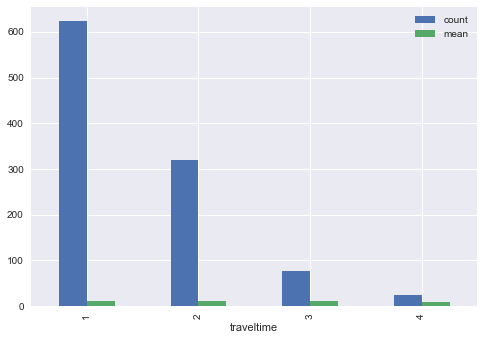

In [93]:
#Analyzing traveltime

print(data_personal[['traveltime','G3']].groupby('traveltime').describe()['G3'])

data_personal[['traveltime','G3']].groupby('traveltime').describe()['G3'][[(1,'mean'),(2,'mean'),(3,'mean'),(4,'mean'),(1,'count'),(2,'count'),(3,'count'),(4,'count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

The codes are 
1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour

As we can see from the counts the counts,the data is heavily skewed towards students living less than half an hour from their school. We do see a correlation where the perfromance of students living closer to school is higher than the ones living farther from the instituion. But since the data is so heavily partial to the former group, we can't considert this to be a conclusion. Thus I choose to conclude that **Student performance is not correlated with travel time**

studytime       
1          count    317.000000
           mean      10.580442
           std        3.891405
           min        0.000000
           25%        9.000000
           50%       11.000000
           75%       13.000000
           max       19.000000
2          count    503.000000
           mean      11.335984
           std        3.772468
           min        0.000000
           25%       10.000000
           50%       11.000000
           75%       14.000000
           max       19.000000
3          count    162.000000
           mean      12.493827
           std        3.618872
           min        0.000000
           25%       11.000000
           50%       13.000000
           75%       15.000000
           max       19.000000
4          count     62.000000
           mean      12.274194
           std        4.223934
           min        0.000000
           25%       10.000000
           50%       12.000000
           75%       15.000000
           max       2

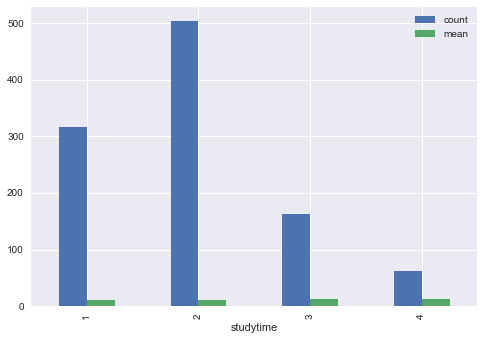

In [94]:
## Analyse study time

print(data_personal[['studytime','G3']].groupby('studytime').describe()['G3'])

data_personal[['studytime','G3']].groupby('studytime').describe()['G3'][[(1,'mean'),(2,'mean'),(3,'mean'),(4,'mean'),(1,'count'),(2,'count'),(3,'count'),(4,'count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()


Same as is the case for travel time the data here is skewed, again though it seems that **study time is positvely coorelated with performance; it can't be stated with confidence**.

failures       
0         count    861.000000
          mean      12.054588
          std        3.428071
          min        0.000000
          25%       10.000000
          50%       12.000000
          75%       14.000000
          max       20.000000
1         count    120.000000
          mean       8.425000
          std        4.009783
          min        0.000000
          25%        8.000000
          50%       10.000000
          75%       11.000000
          max       18.000000
2         count     33.000000
          mean       7.484848
          std        4.272888
          min        0.000000
          25%        6.000000
          50%        8.000000
          75%       10.000000
          max       15.000000
3         count     30.000000
          mean       6.800000
          std        3.745342
          min        0.000000
          25%        5.500000
          50%        8.000000
          75%       10.000000
          max       11.000000
Name: G3, dtype: float64

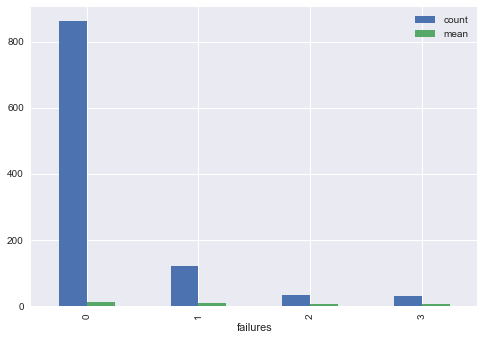

In [95]:
print(data_personal[['failures','G3']].groupby('failures').describe()['G3'])

data_personal[['failures','G3']].groupby('failures').describe()['G3'][[(0,'mean'),(1,'mean'),(2,'mean'),(3,'mean'),(0,'count'),(1,'count'),(2,'count'),(3,'count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

Once again we see a huge skew of data. But this is somewhat of a normal expectation. So we need to work with what we have. Let's plot the mean scores for some further clarity


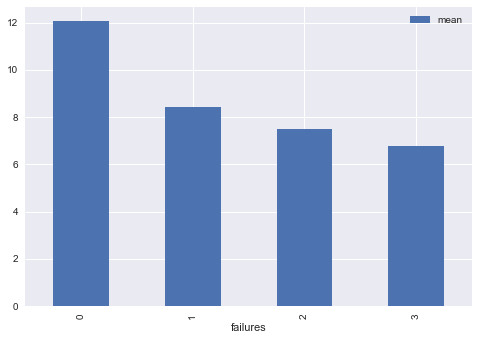

In [96]:
data_personal[['failures','G3']].groupby('failures').describe()['G3'][[(0,'mean'),(1,'mean'),(2,'mean'),(3,'mean')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

We do see a trend here. That **with an increase in number of failures, the performance of a student steadily deteriorates**. Though we don't have the data on our side, this insight does make a lot of sense. So I choose to run with it. 

paid       
no    count    824.000000
      mean      11.440534
      std        3.919464
      min        0.000000
      25%       10.000000
      50%       12.000000
      75%       14.000000
      max       20.000000
yes   count    220.000000
      mean      10.972727
      std        3.637599
      min        0.000000
      25%        9.000000
      50%       11.000000
      75%       13.000000
      max       19.000000
Name: G3, dtype: float64


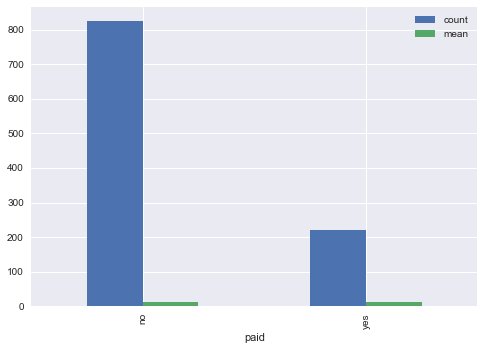

In [97]:
#Analysis of the effect of extra classes on student's performance

print(data_personal[['paid','G3']].groupby('paid').describe()['G3'])

data_personal[['paid','G3']].groupby('paid').describe()['G3'][[('no','mean'),('yes','mean'),('no','count'),('yes','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

One might assume that students with extra paid classes might perform better, but that is not the case. One reason for this is in fact that a lower performance could be the reason why the student chose for extra tution in the first place. This is substantiated by the fact that ***students without extra classes tend to perform better than students with extra classes***, but because of the data skew, it's not safe to assume anything

activities       
no          count    528.000000
            mean      11.212121
            std        3.799092
            min        0.000000
            25%       10.000000
            50%       11.000000
            75%       14.000000
            max       19.000000
yes         count    516.000000
            mean      11.474806
            std        3.930136
            min        0.000000
            25%       10.000000
            50%       12.000000
            75%       14.000000
            max       20.000000
Name: G3, dtype: float64


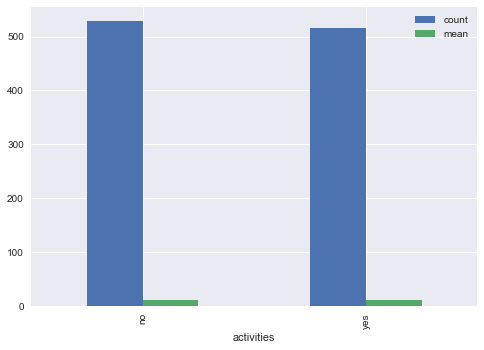

In [98]:
#Analysis of the effect of extra curricular on student's performance

print(data_personal[['activities','G3']].groupby('activities').describe()['G3'])

data_personal[['activities','G3']].groupby('activities').describe()['G3'][[('no','mean'),('yes','mean'),('no','count'),('yes','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

As we can see students perform more or less the same regardless of their participation in extracurricullar activites. **Students tend to perform nominally better when they do engage in extra curricular activities**, this could be explained by the addition of a supportive peer group, and the confidence/motivation gained by participating in said activities

nursery       
no       count    209.000000
         mean      11.033493
         std        3.776678
         min        0.000000
         25%       10.000000
         50%       11.000000
         75%       13.000000
         max       19.000000
yes      count    835.000000
         mean      11.419162
         std        3.884930
         min        0.000000
         25%       10.000000
         50%       12.000000
         75%       14.000000
         max       20.000000
Name: G3, dtype: float64


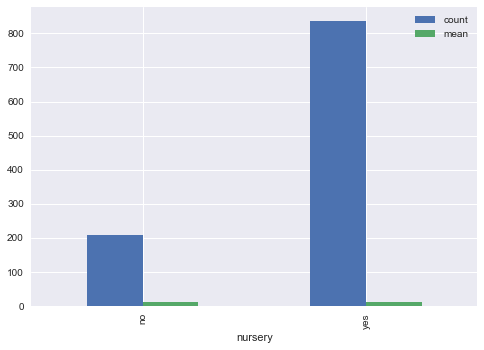

In [99]:
#Analysis of the effect of nursery education on student's performance

print(data_personal[['nursery','G3']].groupby('nursery').describe()['G3'])

data_personal[['nursery','G3']].groupby('nursery').describe()['G3'][[('no','mean'),('yes','mean'),('no','count'),('yes','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

As we can see that the number of students who have had a nursery education far exceed those who have not. But regardless of that the performance seems to be pretty much similare, thus we conclude that **Nursery education has no significance over student performance**

higher       
no      count     89.000000
        mean       8.348315
        std        3.545487
        min        0.000000
        25%        8.000000
        50%        9.000000
        75%       10.000000
        max       14.000000
yes     count    955.000000
        mean      11.620942
        std        3.775789
        min        0.000000
        25%       10.000000
        50%       12.000000
        75%       14.000000
        max       20.000000
Name: G3, dtype: float64


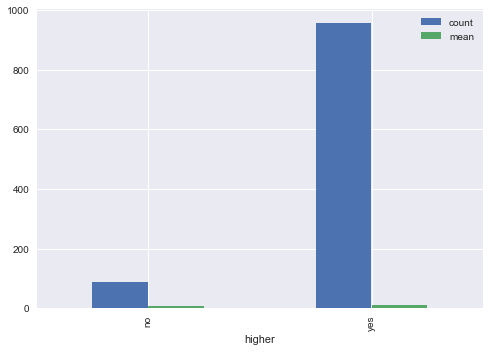

In [100]:
print(data_personal[['higher','G3']].groupby('higher').describe()['G3'])

data_personal[['higher','G3']].groupby('higher').describe()['G3'][[('no','mean'),('yes','mean'),('no','count'),('yes','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

As we see from the given data, **the intent to pursue higher education does indicate a better performance** but that could be just because of the skew in the data. So we can't conclude anything from it

internet       
no        count    217.000000
          mean      10.534562
          std        3.855006
          min        0.000000
          25%        9.000000
          50%       11.000000
          75%       13.000000
          max       19.000000
yes       count    827.000000
          mean      11.553809
          std        3.841653
          min        0.000000
          25%       10.000000
          50%       12.000000
          75%       14.000000
          max       20.000000
Name: G3, dtype: float64


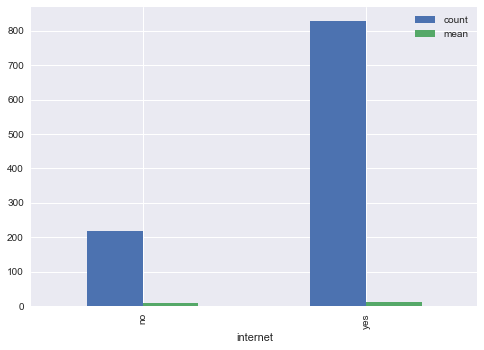

In [101]:
print(data_personal[['internet','G3']].groupby('internet').describe()['G3'])

data_personal[['internet','G3']].groupby('internet').describe()['G3'][[('no','mean'),('yes','mean'),('no','count'),('yes','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

As we see from the given data, **the presence of an internet connection does indicate a better performance** but that could be just because of the skew in the data. So we can't conclude anything from it

romantic       
no        count    673.000000
          mean      11.624071
          std        3.659196
          min        0.000000
          25%       10.000000
          50%       12.000000
          75%       14.000000
          max       20.000000
yes       count    371.000000
          mean      10.830189
          std        4.168836
          min        0.000000
          25%        9.000000
          50%       11.000000
          75%       14.000000
          max       18.000000
Name: G3, dtype: float64


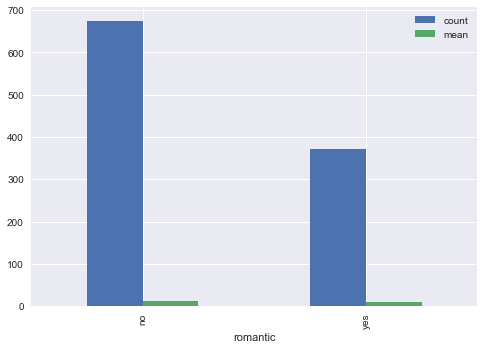

In [102]:
print(data_personal[['romantic','G3']].groupby('romantic').describe()['G3'])

data_personal[['romantic','G3']].groupby('romantic').describe()['G3'][[('no','mean'),('yes','mean'),('no','count'),('yes','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

As we see from the given data, ** romantic entaglement indicates a better performance** but that could be just because of the skew in the data. So we can't conclude anything from it

freetime       
1         count     64.000000
          mean      11.171875
          std        3.401935
          min        0.000000
          25%       10.000000
          50%       11.000000
          75%       13.000000
          max       19.000000
2         count    171.000000
          mean      12.280702
          std        3.790488
          min        0.000000
          25%       11.000000
          50%       13.000000
          75%       15.000000
          max       20.000000
3         count    408.000000
          mean      11.183824
          std        3.965209
          min        0.000000
          25%       10.000000
          50%       11.000000
          75%       14.000000
          max       19.000000
4         count    293.000000
          mean      11.208191
          std        3.662238
          min        0.000000
          25%       10.000000
          50%       11.000000
          75%       14.000000
          max       19.000000
5         count    108.0

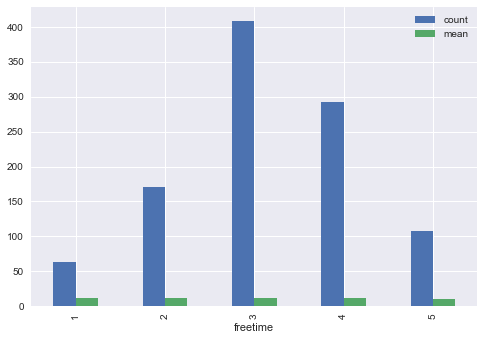

In [103]:
print(data_personal[['freetime','G3']].groupby('freetime').describe()['G3'])

data_personal[['freetime','G3']].groupby('freetime').describe()['G3'][[(1,'mean'),(2,'mean'),(3,'mean'),(4,'mean'),(5,'mean'),(1,'count'),(2,'count'),(3,'count'),(4,'count'),(5,'count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

We do see an interesting statistic here, comapring the 2(less free time) cataegory to the 5(lots of free time), The performance of a student in the former group is markedly better than the one in the latter. So **Surprisingly, having lots of free time somehow negatively correlates with student performance** 

health       
1       count    137.000000
        mean      12.270073
        std        3.669235
        min        0.000000
        25%       10.000000
        50%       13.000000
        75%       15.000000
        max       19.000000
2       count    123.000000
        mean      11.471545
        std        4.321743
        min        0.000000
        25%       10.000000
        50%       12.000000
        75%       14.000000
        max       20.000000
3       count    215.000000
        mean      11.065116
        std        3.719793
        min        0.000000
        25%       10.000000
        50%       11.000000
        75%       13.000000
        max       19.000000
4       count    174.000000
        mean      11.471264
        std        3.951554
        min        0.000000
        25%       10.000000
        50%       12.000000
        75%       14.000000
        max       19.000000
5       count    395.000000
        mean      11.073418
        std        3.783101
      

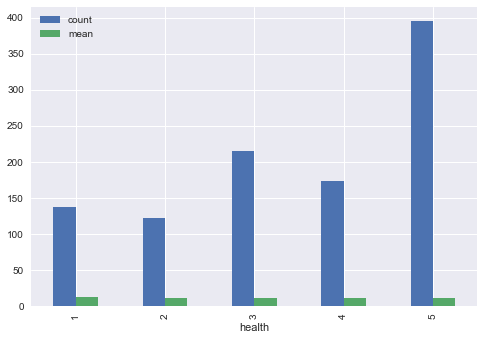

In [104]:
print(data_personal[['health','G3']].groupby('health').describe()['G3'])

data_personal[['health','G3']].groupby('health').describe()['G3'][[(1,'mean'),(2,'mean'),(3,'mean'),(4,'mean'),(5,'mean'),(1,'count'),(2,'count'),(3,'count'),(4,'count'),(5,'count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

Here the data seems to be more or less equally distributed amongst the various cataegories, with a slight bias to the very healthy cataegory. Let's plot their mean scores seperately. 

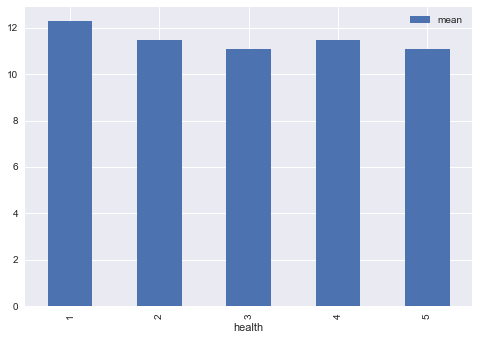

In [105]:
data_personal[['health','G3']].groupby('health').describe()['G3'][[(1,'mean'),(2,'mean'),(3,'mean'),(4,'mean'),(5,'mean')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

So here we are able to uncover a very surprising insight. **Amazingly students who are the least healthiest tend to perform better than rest of the group** This feels really counter intuitive to our perception. 

goout       
1      count     71.000000
       mean      10.450704
       std        4.364757
       min        0.000000
       25%        9.500000
       50%       11.000000
       75%       13.500000
       max       17.000000
2      count    248.000000
       mean      12.056452
       std        3.858431
       min        0.000000
       25%       10.000000
       50%       12.000000
       75%       15.000000
       max       20.000000
3      count    335.000000
       mean      11.689552
       std        3.511194
       min        0.000000
       25%       10.000000
       50%       12.000000
       75%       14.000000
       max       19.000000
4      count    227.000000
       mean      11.092511
       std        3.680285
       min        0.000000
       25%        9.000000
       50%       11.000000
       75%       13.000000
       max       19.000000
5      count    163.000000
       mean      10.276074
       std        4.279276
       min        0.000000
       25%     

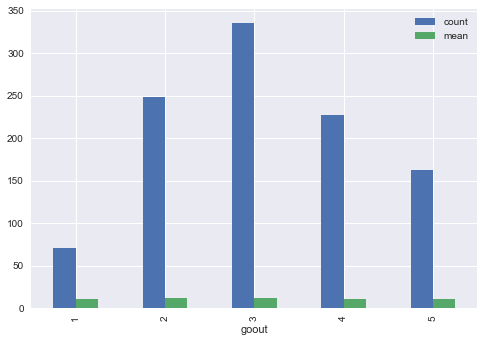

In [106]:
print(data_personal[['goout','G3']].groupby('goout').describe()['G3'])

data_personal[['goout','G3']].groupby('goout').describe()['G3'][[(1,'mean'),(2,'mean'),(3,'mean'),(4,'mean'),(5,'mean'),(1,'count'),(2,'count'),(3,'count'),(4,'count'),(5,'count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

This data is interesting to examine because a **extremely low rate of social interaction (1) or an extremly high one(5) both tend to a lower student performance. So a student who goes out moderately (2/3) will presumably perform better** 

Dalc       
1     count    727.000000
      mean      11.704264
      std        3.851124
      min        0.000000
      25%       10.000000
      50%       12.000000
      75%       14.000000
      max       20.000000
2     count    196.000000
      mean      10.556122
      std        4.082723
      min        0.000000
      25%        9.000000
      50%       11.000000
      75%       13.000000
      max       18.000000
3     count     69.000000
      mean      10.898551
      std        2.755449
      min        0.000000
      25%       10.000000
      50%       10.000000
      75%       12.000000
      max       18.000000
4     count     26.000000
      mean       9.269231
      std        4.386869
      min        0.000000
      25%        9.000000
      50%       11.000000
      75%       12.000000
      max       14.000000
5     count     26.000000
      mean      10.384615
      std        2.815343
      min        5.000000
      25%        9.000000
      50%       11.000000


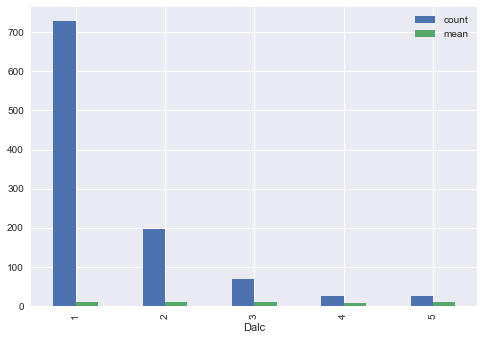

In [107]:
print(data_personal[['Dalc','G3']].groupby('Dalc').describe()['G3'])

data_personal[['Dalc','G3']].groupby('Dalc').describe()['G3'][[(1,'mean'),(2,'mean'),(3,'mean'),(4,'mean'),(5,'mean'),(1,'count'),(2,'count'),(3,'count'),(4,'count'),(5,'count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

Not much can be said about this. Though **students with lesser alcohol intake perform better** but since majority of students choose to drink very less during a weekday the data is highly skewed to draw any conclusions. 

Walc       
1     count    398.000000
      mean      11.743719
      std        4.046287
      min        0.000000
      25%       10.000000
      50%       12.000000
      75%       14.000000
      max       20.000000
2     count    235.000000
      mean      11.472340
      std        3.994960
      min        0.000000
      25%       10.000000
      50%       12.000000
      75%       14.000000
      max       19.000000
3     count    200.000000
      mean      11.290000
      std        3.685623
      min        0.000000
      25%       10.000000
      50%       11.500000
      75%       14.000000
      max       18.000000
4     count    138.000000
      mean      10.536232
      std        3.185642
      min        0.000000
      25%        9.000000
      50%       11.000000
      75%       12.000000
      max       19.000000
5     count     73.000000
      mean      10.397260
      std        3.777638
      min        0.000000
      25%        9.000000
      50%       11.000000


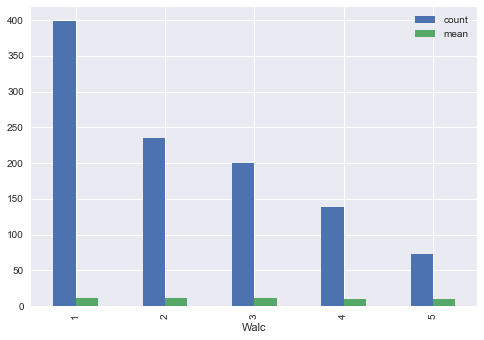

In [108]:
print(data_personal[['Walc','G3']].groupby('Walc').describe()['G3'])

data_personal[['Walc','G3']].groupby('Walc').describe()['G3'][[(1,'mean'),(2,'mean'),(3,'mean'),(4,'mean'),(5,'mean'),(1,'count'),(2,'count'),(3,'count'),(4,'count'),(5,'count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

The conclusion drawn for Dalc holds here too. But we can conclude with higher confidence given the spread of data.

### <u> Group 3: Conclusions</u>

**While considering these insights please keep in mind that the data for this group was heavily biased in most cases**

1. Students with lesser alcohol intake perform better (Daily/weekly)
<br><br>
2. Extremely low rate of social interaction (1) or an extremly high one(5) both tend to a lower student performance. So a student who goes out moderately (2/3) will presumably perform better
<br><br>
3. Amazingly students who are the least healthiest tend to perform better than rest of the group
<br><br>
4. Surprisingly, having lots of free time somehow negatively correlates with student performance
<br><br>
5. Romantic entaglement indicates a better performance
<br><br>
6. The intent to pursue higher education does indicate a better performance
<br><br>
7. Students tend to perform nominally better when they do engage in extra curricular activities
<br><br>
8. Students without extra classes tend to perform better than students with extra classes
<br><br>
9. With an increase in number of failures, the performance of a student steadily deteriorates
<br><br>
10. Study time is positvely coorelated with performance

### <u>Group 4: Schools</u>

Unfortunately we don't have a lot of data about the parameters of the school. We have two, the name of the school and does it support extra classes, so let's focus on that

In [109]:
data_school = data.ix[:,['school','schoolsup','G3']]

data_school['school'] = data_school['school'].str.strip()
data_school['schoolsup'] = data_school['schoolsup'].str.strip()

school       
GP      count    772.000000
        mean      11.633420
        std        3.809208
        min        0.000000
        25%       10.000000
        50%       12.000000
        75%       14.000000
        max       20.000000
MS      count    272.000000
        mean      10.514706
        std        3.908521
        min        0.000000
        25%        9.000000
        50%       10.000000
        75%       13.000000
        max       19.000000
Name: G3, dtype: float64


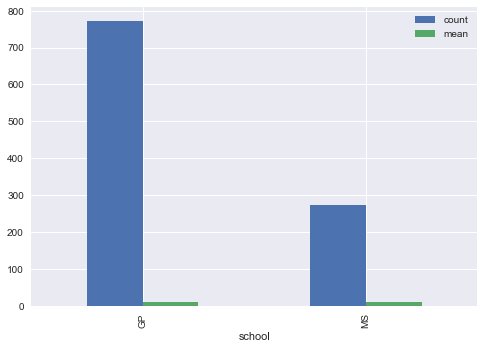

In [110]:
print(data_school[['school','G3']].groupby('school').describe()['G3'])

data_school[['school','G3']].groupby('school').describe()['G3'][[('GP','mean'),('MS','mean'),('GP','count'),('MS','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

All we can conclude from this is that the the predomiant school in the area is GP. Though students from there tend to perform better this could again be because of data skew. 

schoolsup       
no         count    925.000000
           mean      11.451892
           std        3.977087
           min        0.000000
           25%       10.000000
           50%       12.000000
           75%       14.000000
           max       20.000000
yes        count    119.000000
           mean      10.487395
           std        2.708635
           min        0.000000
           25%        9.000000
           50%       11.000000
           75%       12.000000
           max       18.000000
Name: G3, dtype: float64


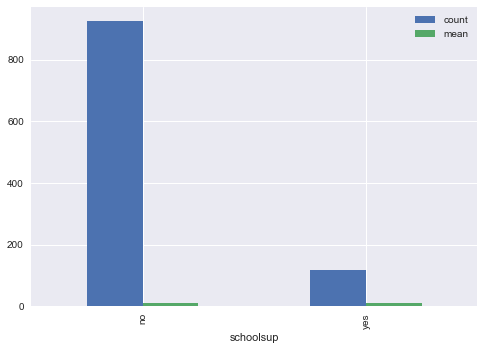

In [111]:
print(data_school[['schoolsup','G3']].groupby('schoolsup').describe()['G3'])

data_school[['schoolsup','G3']].groupby('schoolsup').describe()['G3'][[('no','mean'),('yes','mean'),('no','count'),('yes','count')]].unstack().plot(kind='bar', use_index='False', )
plt.show()

Students in the schools and courses that support extra classes do tend to perform better than other students but yet again the data is skewed in their favor. 

## <u>**Section 1: Conclusions**</u>

Aggregating all our conclusions we get the following list of insights


1. Gender has no influence on student performance
<br><br>
2. Age has no influence on student performance.
<br><br>
3. Very few enrollments by students older than 18 years.
<br><br>

4. The presence of absence of Family support has no influence on Student performance
<br>
<br>
5. We can't assume any correlation exists between family relations and student performance
<br>
<br>
6. Jobs in health sector and education sector correlate to a better student performance.
<br>
<br>
7. The higher the parent's education, the better the student's performance
<br>
<br>
8. It is more likely that women will pursue secondary and higher education than men. 52% of women have chosen to pursue secondary or higher education compared to 43% of the men
<br>
<br>
9.  Only 10% of the male populations are into these specialized sectors(health and education), compared to 20% of the female population. This also confirms the fact that women tend to be better educated than men, since a higher education is a prerequisite for entry in such sectors
<br>
<br>
10. Parent's cohabitation status has no effect on student performance
<br>
<br>
11. Family size has no impact on student performance.
<br><br>

12. Students with lesser alcohol intake perform better (Daily/weekly)
<br><br>
13. Extremely low rate of social interaction (1) or an extremly high one(5) both tend to a lower student performance. So a student who goes out moderately (2/3) will presumably perform better
<br><br>
14. Amazingly students who are the least healthiest tend to perform better than rest of the group
<br><br>
15. Surprisingly, having lots of free time somehow negatively correlates with student performance
<br><br>
16. Romantic entaglement indicates a better performance
<br><br>
17. The intent to pursue higher education does indicate a better performance
<br><br>
18. Students tend to perform nominally better when they do engage in extra curricular activities
<br><br>
19. Students without extra classes tend to perform better than students with extra classes
<br><br>
20. With an increase in number of failures, the performance of a student steadily deteriorates
<br><br>
21. Study time is positvely coorelated with performance

## <u> Section 2: Modelling </u>

So to reiterate, the goal of this exercise is to to predict whether a student is likely to fail the third grade G3. Irrespective of the model we choose, we need to first choose a set of features from the data that we need to give as input to the model. Let's check out the correlation of the features with G3

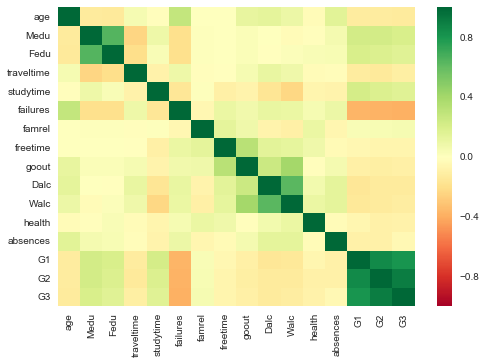

In [112]:
import seaborn as sns

corr = data.corr()

sns.heatmap(corr, fmt="g", cmap='RdYlGn')
plt.show()

The heatmap more or less confirms the analysis we have done before, we see that G3 is postively correlated with the parent's education, studytime. It is negatively correlated with the number of failures. Also there is a very strong correlation of G3, with the previous year's performance grades. One thing to note is that this works only on numerical data. Let's make a few adjustments to the code to get it to work on all columns

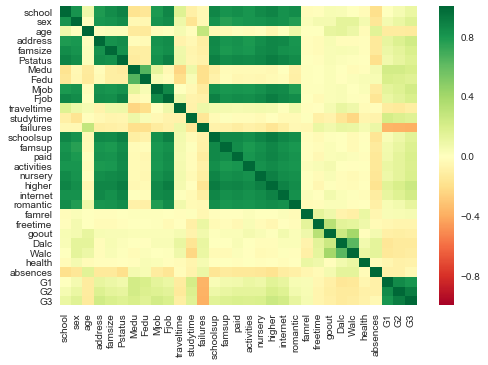

In [113]:
data_enc = data.copy()


data_enc['school']=data_enc['school'].astype('category')
data_enc['sex']=data_enc['sex'].astype('category')
data_enc['address']=data_enc['address'].astype('category')
data_enc['famsize']=data_enc['famsize'].astype('category')
data_enc['Pstatus']=data_enc['Pstatus'].astype('category')
data_enc['Mjob']=data_enc['Mjob'].astype('category')
data_enc['Fjob']=data_enc['Fjob'].astype('category')
data_enc['schoolsup']=data_enc['schoolsup'].astype('category')
data_enc['famsup']= data_enc['famsup'].astype('category') 
data_enc['paid']=data_enc['paid'].astype('category')
data_enc['activities']=data_enc['activities'].astype('category')
data_enc['nursery']=data_enc['nursery'].astype('category')
data_enc['higher']=data_enc['higher'].astype('category')
data_enc['internet']=data_enc['internet'].astype('category')
data_enc['romantic']=data_enc['romantic'].astype('category')
data_enc['health']= data_enc['health'].astype('category')
data_enc['Medu'] = data_enc['Medu'].astype('category')
data_enc['Fedu'] = data_enc['Fedu'].astype('category')
data_enc['traveltime'] = data_enc['traveltime'].astype('category')
data_enc['studytime'] = data_enc['studytime'].astype('category')
data_enc['failures'] = data_enc['failures'].astype('category')
data_enc['famrel'] = data_enc['famrel'].astype('category')
data_enc['freetime'] = data_enc['freetime'].astype('category')
data_enc['goout'] = data_enc['goout'].astype('category')
data_enc['Dalc'] = data_enc['Dalc'].astype('category')
data_enc['Walc'] = data_enc['Walc'].astype('category')
data_enc['health'] = data_enc['health'].astype('category')    


cat_columns = data_enc.select_dtypes(['category']).columns
data_enc[cat_columns] = data_enc[cat_columns].apply(lambda x: x.cat.codes)
corr = data_enc.corr()

sns.heatmap(corr, fmt="g", cmap='RdYlGn')
plt.show()

This provides a much more comprehensive view about our data. As we can see G3 is predominantly correlated to G1 and G2. Also there are weak correlations to quite a lot of the remaining data, noticeably sex, address,Medu, Mjob,Fjob, studytime, failures, higher and intenet. As explained above some of these correlations could be just because inherent skews in our data.

### <u> Model 1 </u>

The first model we create is a simple regression model that uses only the main independent factors G1 and G2 to predict G3. 


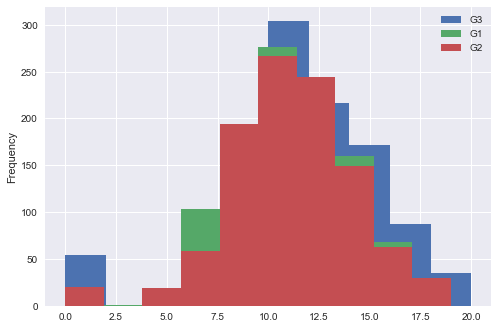

In [114]:
data_G12_X = data.iloc[:,-3:-1]
data_G12_y = data.iloc[:,-1]


data_G12_y.to_frame().plot.hist(label = 'G3')
data_G12_X['G1'].plot.hist(label = 'G1')
data_G12_X['G2'].plot.hist(label = 'G2')

plt.legend()
plt.show()

In [115]:
#Splitting into training set and test set


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_G12_X,data_G12_y,test_size=0.2,random_state=42)



#Fitting SLR to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train,y_train)

#Predicting Test Set Results
y_pred = regressor.predict(X_test)

Now let's test the accuracy of the following model

In [116]:
#Testing the accuracy of the predictions
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.85071341035329329

We see that we've got an r2 score of .85, which is pretty good. 

In [117]:
#Final result is that we predict if G3 will pass or fail with >=10 pass

mask1 = y_test>=10
mask2 = y_pred>=10

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(mask1, mask2)
cm

array([[ 46,   0],
       [ 29, 134]])

So as we can see from the confusion matrix, we have an **accuracy of 86.12%**. Also this model has no type I errors (Students who actually failed but were predicted to pass) which is good. There are 29 type II errors(Students who passed but were predicted to fail). Thus by using this model we can identify student who will pass or fail given their G1 and G2 scores, and offer extra coaching/attention to them

### <u>Model 2</u>

In this model, we experiment by taking other correlating factors into assumption. We will  build a decison tree and see how it goes. To choose the factors we make use of the conclusions that we drew in Section 1. 

In [118]:
# dalc walc health freetime romantic activities paid
# data_decison = data.ix[:,['sex', 'address','Medu', 'Mjob','Fjob','studytime','failures','higher','internet','G1','G2']]
data_decison = data.ix[:,['Dalc','Walc','health','freetime','romantic','activities','paid','Medu', 'Mjob','Fjob','studytime','failures','higher','internet','G1','G2']]

data_decison_y = data.iloc[:,-1]

data_decison['Mjob']=data_decison['Mjob'].astype('category')
data_decison['Fjob']=data_decison['Fjob'].astype('category')
data_decison['higher']=data_decison['higher'].astype('category')
data_decison['internet']=data_decison['internet'].astype('category')
data_decison['Medu'] = data_decison['Medu'].astype('category')
data_decison['studytime'] = data_decison['studytime'].astype('category')
data_decison['failures'] = data_decison['failures'].astype('category')
data_decison['Dalc'] = data_decison['Dalc'].astype('category')
data_decison['Walc'] = data_decison['Walc'].astype('category')
data_decison['health'] = data_decison['health'].astype('category')
data_decison['freetime'] = data_decison['freetime'].astype('category')
data_decison['romantic'] = data_decison['romantic'].astype('category')
data_decison['activities'] = data_decison['activities'].astype('category')
data_decison['paid'] = data_decison['paid'].astype('category')

data_decison['Mjob'] = data_decison['Mjob'].str.strip()
data_decison['higher'] = data_decison['higher'].str.strip()
data_decison['internet'] = data_decison['internet'].str.strip()
data_decison['romantic'] = data_decison['romantic'].str.strip()
data_decison['activities'] = data_decison['activities'].str.strip()
data_decison['paid'] = data_decison['paid'].str.strip()



data_decison_enc=pd.get_dummies(data_decison,drop_first=True)    


In [119]:
#Splitting into training set and test set


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_decison_enc,data_decison_y,test_size=0.2,random_state=42)

# Fitting the DecisonTree Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train,y_train)

#Predicting Test Set Results
y_pred = regressor.predict(X_test)

In [120]:
#Testing the accuracy of the predictions
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6467034571086856

As we see, we have a very low r2 score comparedto the one we had in the regression model. Let's try an aggregation of the decison tree viz. the random forest and see what results we get

In [121]:

# Fitting the RandomForest Model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train,y_train)

#Predicting Test Set Results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.81382485928911574

As can be seen the random forest approach leads to a significant increase in the accuracy. Let's calculate the confusion matrix for this model

In [122]:
#Final result is that we predict if G3 will pass or fail with >=10 pass

mask1 = y_test>=10
mask2 = y_pred>=10

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(mask1, mask2)
cm

array([[ 44,   2],
       [ 22, 141]])

So as we can see from the confusion matrix, we have an **accuracy of 88.51%**, which is better than the Model 1. As you can see taking into consideration other factors does help in increasing accuracy.  This model has 2 type I errors (Students who actually failed but were predicted to pass) which is good. There are 22 type II errors(Students who passed but were predicted to fail). Thus by using this model we can identify student who will pass or fail given their G1 and G2 scores, and offer extra coaching/attention to them

So this allows us to appreciate the effort we put into Section 1. By really understanding and deep diving into the data, we are able to recognize factors that are really useful and then incorporate them into our modelling strategy.

## <u> Conclusion </u>

***Phew!*** We're finally done. This exercise has taught me a lot, and I hope that's the same for anybody who reads this. It has made be appreciate the amount of effort that goes into deciphering and describing a dataset. And this dataset was actually a small one! And we've only done some preliminary analysis on this! I'm sure there are still a lot of insights that can be gathered from this dataset, and as I progress in skill, I'll be sure to come back and look for them. So in the end I'd like to thank you for sticking along till the end. I hope you enjoyed going through this exercise as much as me. 
